<a href="https://colab.research.google.com/github/anargh-t/Online-Gamers-Anxiety-Prediction-Using-Machine-Learning/blob/main/Gamers_Anxiety_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Online Gamers Anxiety Prediction Using Machine Learning**

**Problem Statement**

The project aims to study the correlation between gaming habits and psychological well-being, focusing on anxiety, life satisfaction, and social phobia. It seeks to classify gamers' anxiety levels based on personal information such as age, hours of playing, earnings, gender, etc., to identify significant factors influencing anxiety levels.

**Dataset** : https://www.kaggle.com/datasets/petalme/student-anxiety-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/anxiety.csv',encoding='ISO-8859-1',index_col='S. No.')
df.head()

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
S. No.,,,,,,,,,,,,,,,,,,,,,
1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [ ]:
df.shape

(13464, 54)

In [ ]:
df.dtypes

Timestamp          float64
GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
S

The dataset contains a variety of information related to student anxiety, including Generalized Anxiety Disorder (GAD) assessment scores, Satisfaction With Life (SWL) scores, Social Phobia Inventory (SPIN) scores, and additional details such as gaming habits, platform used, hours spent gaming, and demographic information like gender, age, employment status, and education level. The data types are mostly integers and floats, with some columns containing textual data (objects)

In [ ]:
#Summarize dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,13464.0,42054.841222,0.272948,42052.00437,42054.716548,42054.800675,42054.932112,42058.36375
GAD1,13464.0,0.860963,0.926542,0.00000,0.000000,1.000000,1.000000,3.00000
GAD2,13464.0,0.673351,0.915724,0.00000,0.000000,0.000000,1.000000,3.00000
GAD3,13464.0,0.965761,0.982776,0.00000,0.000000,1.000000,2.000000,3.00000
GAD4,13464.0,0.724079,0.921971,0.00000,0.000000,0.000000,1.000000,3.00000
GAD5,13464.0,0.488042,0.837014,0.00000,0.000000,0.000000,1.000000,3.00000
GAD6,13464.0,0.911022,0.931168,0.00000,0.000000,1.000000,1.000000,3.00000
GAD7,13464.0,0.588755,0.894408,0.00000,0.000000,0.000000,1.000000,3.00000
SWL1,13464.0,3.720440,1.736264,1.00000,2.000000,4.000000,5.000000,7.00000
SWL2,13464.0,4.602050,1.696276,1.00000,3.000000,5.000000,6.000000,7.00000


In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,...,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
Timestamp,1.000000,-0.004000,-0.013507,-0.013820,-0.010515,-0.003289,-0.003688,-0.002251,0.005724,0.008078,...,-0.010976,-0.016380,-0.014024,-0.007185,-0.005354,-0.001401,-0.064874,-0.010089,0.006043,-0.018702
GAD1,-0.004000,1.000000,0.678952,0.603458,0.544008,0.347441,0.377897,0.506427,-0.254976,-0.234409,...,0.289034,0.311755,0.272449,0.236578,0.275183,0.044111,-0.012684,0.793197,-0.316123,0.377417
GAD2,-0.013507,0.678952,1.000000,0.710580,0.568649,0.343386,0.355553,0.572555,-0.272713,-0.253878,...,0.297143,0.315957,0.287650,0.264704,0.275600,0.036055,-0.023494,0.827031,-0.336804,0.383752
GAD3,-0.013820,0.603458,0.710580,1.000000,0.549715,0.317391,0.365815,0.542117,-0.271796,-0.251629,...,0.278738,0.321296,0.305276,0.241336,0.269262,0.042519,-0.058457,0.804238,-0.336853,0.373702
GAD4,-0.010515,0.544008,0.568649,0.549715,1.000000,0.425344,0.388510,0.467421,-0.261263,-0.261239,...,0.264259,0.279277,0.244934,0.226774,0.244839,0.042186,0.009359,0.768647,-0.327577,0.335865
GAD5,-0.003289,0.347441,0.343386,0.317391,0.425344,1.000000,0.313700,0.321594,-0.129054,-0.136861,...,0.184761,0.187072,0.150116,0.156486,0.164344,0.061379,-0.026822,0.584987,-0.171087,0.217657
GAD6,-0.003688,0.377897,0.355553,0.365815,0.388510,0.313700,1.000000,0.364888,-0.217258,-0.205396,...,0.205718,0.241621,0.236032,0.178800,0.193362,0.141047,-0.051095,0.618156,-0.274837,0.283239
GAD7,-0.002251,0.506427,0.572555,0.542117,0.467421,0.321594,0.364888,1.000000,-0.226236,-0.237372,...,0.294538,0.301077,0.267322,0.244640,0.258576,0.040073,-0.048464,0.734228,-0.298772,0.353922
SWL1,0.005724,-0.254976,-0.272713,-0.271796,-0.261263,-0.129054,-0.217258,-0.226236,1.000000,0.613430,...,-0.153690,-0.217548,-0.190881,-0.158450,-0.150557,0.001991,-0.007879,-0.319659,0.851646,-0.256374
SWL2,0.008078,-0.234409,-0.253878,-0.251629,-0.261239,-0.136861,-0.205396,-0.237372,0.613430,1.000000,...,-0.159046,-0.193133,-0.161659,-0.175970,-0.147916,0.002898,-0.031955,-0.308903,0.768197,-0.232244


<ipython-input-7-2a0f3aeaf6dd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues')


<Axes: >

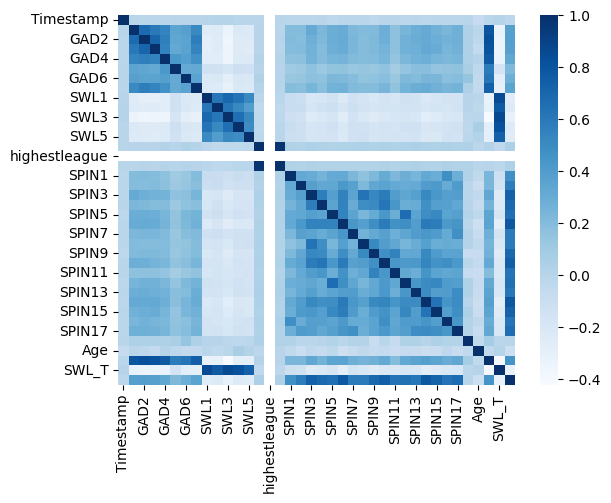

In [ ]:
#Correlation Matrix Visualization

sns.heatmap(df.corr(),cmap='Blues')

In [ ]:
df.isna().sum()

Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23


In [ ]:
#drop unwanted

df.drop(['Timestamp','highestleague'],axis=1,inplace=True)

Value Analysis

In [ ]:
for i in df:
  print(df[i].value_counts())
  print('-----------')

0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
-----------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
-----------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
-----------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
-----------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
-----------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
-----------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
-----------
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64
-----------
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: SWL1, dtype: int64
-----------
6    3715
5    2869
4    1724
3    1660
2    1447
7    1418
1     631
Name: SWL2, dtype: int64
-----------
6    3417
5    2589
3    1785
2    1756
4    1626
7    1233
1    1058
Name: SWL3, dtype: int64

In [ ]:
for i in df:
  print(i)
  print('number of unique values: ',df[i].nunique())
  print(df[i].unique() [:30])
  print('------')

GAD1
number of unique values:  4
[0 1 2 3]
------
GAD2
number of unique values:  4
[0 2 1 3]
------
GAD3
number of unique values:  4
[0 2 3 1]
------
GAD4
number of unique values:  4
[0 2 3 1]
------
GAD5
number of unique values:  4
[1 0 2 3]
------
GAD6
number of unique values:  4
[0 1 3 2]
------
GAD7
number of unique values:  4
[0 1 2 3]
------
GADE
number of unique values:  4
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
------
SWL1
number of unique values:  7
[3 2 5 7 6 1 4]
------
SWL2
number of unique values:  7
[5 6 2 4 3 7 1]
------
SWL3
number of unique values:  7
[5 2 4 3 6 7 1]
------
SWL4
number of unique values:  7
[5 2 3 6 1 7 4]
------
SWL5
number of unique values:  7
[5 1 2 3 7 6 4]
------
Game
number of unique values:  11
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
------
Platform
number of unique values:  

In [ ]:
#remove rows with participant gaming over 168 hours, since that is not possible

df=df[~(df['Hours']>168)]

Cleaning

In [ ]:
#Fill missing values for numerical dadta with the mode
numerical_columns = ['Hours','streams','SPIN1','SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'SPIN_T']
for i in numerical_columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
#Fill missing values for categorical data with mode
categorical_columns = ['League','Work', 'Reference', 'Residence_ISO3', 'Birthplace_ISO3']
for i in categorical_columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.GADE.value_counts()

Not difficult at all    6235
Somewhat difficult      5148
Very difficult          1011
Extremely difficult      419
Name: GADE, dtype: int64

In [ ]:
df.GADE.fillna(df.GADE.value_counts().index[1], inplace=True)
df.GADE.value_counts()

Not difficult at all    6235
Somewhat difficult      5797
Very difficult          1011
Extremely difficult      419
Name: GADE, dtype: int64

In [ ]:
df.accept.value_counts()

Accept    13048
Name: accept, dtype: int64

In [ ]:
df.isna().sum()

GAD1                 0
GAD2                 0
GAD3                 0
GAD4                 0
GAD5                 0
GAD6                 0
GAD7                 0
GADE                 0
SWL1                 0
SWL2                 0
SWL3                 0
SWL4                 0
SWL5                 0
Game                 0
Platform             0
Hours                0
earnings             0
whyplay              0
League               0
streams              0
SPIN1                0
SPIN2                0
SPIN3                0
SPIN4                0
SPIN5                0
SPIN6                0
SPIN7                0
SPIN8                0
SPIN9                0
SPIN10               0
SPIN11               0
SPIN12               0
SPIN13               0
SPIN14               0
SPIN15               0
SPIN16               0
SPIN17               0
Narcissism           0
Gender               0
Age                  0
Work                 0
Degree               0
Birthplace           0
Residence  

In [ ]:
import string

# Clean text data in the 'Playstyle', 'earnings', and 'whyplay' columns
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))


In [ ]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()

In [ ]:
df['Playstyle'].nunique()

287

In [ ]:
df.drop(['accept','Birthplace','Birthplace_ISO3'], axis=1, inplace=True)

In [ ]:
df['earnings'].value_counts()

i play for fun                                                                           12112
i play mostly for fun but earn a little on the side tournament winnings streaming etc      990
i earn a living by playing this game                                                        47
i play to win                                                                                4
i play to get better                                                                         2
                                                                                         ...  
i play for fun but if there's an opportunity to earn some money i would love to              1
keep in touch w friends                                                                      1
i play for fun and working on making earn out of it                                          1
i play ranked mostly                                                                         1
strive to be pro                                  

In [ ]:
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

i play for fun                                                                           12112
i play mostly for fun but earn a little on the side tournament winnings streaming etc      990
Other                                                                                      313
i earn a living by playing this game                                                        47
Name: earnings, dtype: int64

In [ ]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

having fun          5289
improving           4927
winning             2090
relaxing             654
Other                446
all of the above      56
Name: whyplay, dtype: int64

In [ ]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

multiplayer  online  with real life friends                    5564
multiplayer  online  with strangers                            4134
multiplayer  online  with online acquaintances or teammates    2652
singleplayer                                                    761
Other                                                           303
multiplayer  offline people in the same room                     48
Name: Playstyle, dtype: int64

In [ ]:
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(12525, 49)

In [ ]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
S. No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,Not difficult at all,3,5,...,25,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,singleplayer,1,23,5.0,USA
2,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,41,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,multiplayer online with strangers,8,16,33.0,USA
3,0,2,2,0,0,3,1,Not difficult at all,2,6,...,32,Employed,Bachelor (or equivalent),Germany,Reddit,singleplayer,8,17,31.0,DEU
4,0,0,0,0,0,0,0,Not difficult at all,2,5,...,28,Employed,Bachelor (or equivalent),USA,Reddit,multiplayer online with online acquaintances...,0,17,11.0,USA
5,2,1,2,2,2,3,2,Very difficult,2,2,...,19,Employed,High school diploma (or equivalent),South Korea,Reddit,multiplayer online with strangers,14,14,13.0,KOR


**EDA**

How distributed in terms of Age

count    12525.000000
mean        20.952016
std          3.313857
min         18.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         63.000000
Name: Age, dtype: float64


<Axes: >

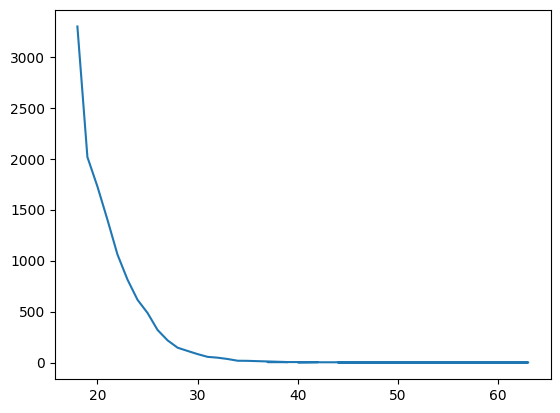

In [ ]:
print(df.Age.describe())
df.Age.value_counts().plot(kind='line')

As expected we have a very young age-group with a mean of about 21. The youngest participants have the minimum required age to participate in the survey: 18, while the oldest participant has the age of 63.



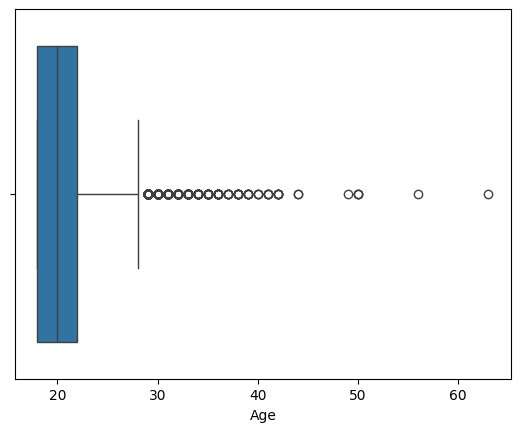

In [ ]:
sns.boxplot(x=df.Age)
plt.show()

For later analysis it might be useful to identify and get rid of any outliers (by age). For that calculate the upper age-limit:



In [ ]:
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR = Q3-Q1
upper_whisker = Q3 + 1.5*IQR
print(upper_whisker)
df_withoutOutliers = df.query('Age <= @upper_whisker')
print(f"Percentage of outliers in original Data: { (1 - df_withoutOutliers.size / df.size) * 100 }")


28.0
Percentage of outliers in original Data: 3.377245508982041


Boxplot without the outliers:

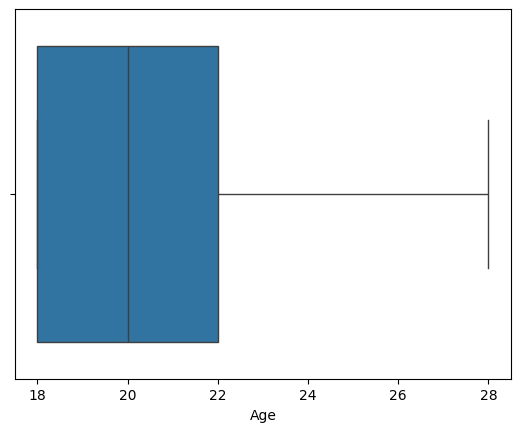

In [ ]:
sns.boxplot(x=df_withoutOutliers.Age)
plt.show()

How distributed in terms of Gender

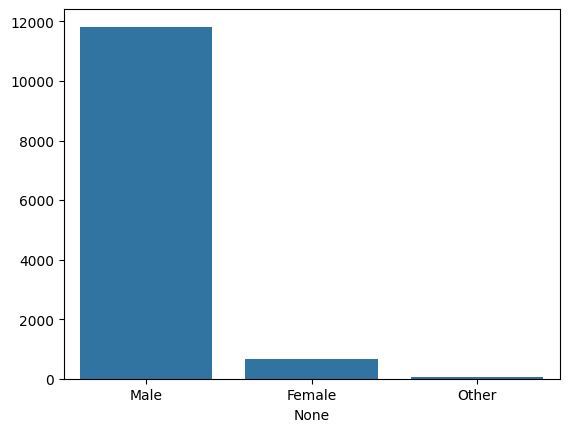

Percentage of Male participants is  94.3872255489022 %


In [ ]:
gender_counts = df.Gender.value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.show()

male_percent = gender_counts['Male'] / df.shape[0] * 100
print('Percentage of Male participants is ',male_percent,'%')

How distributed is our data in terms of residence

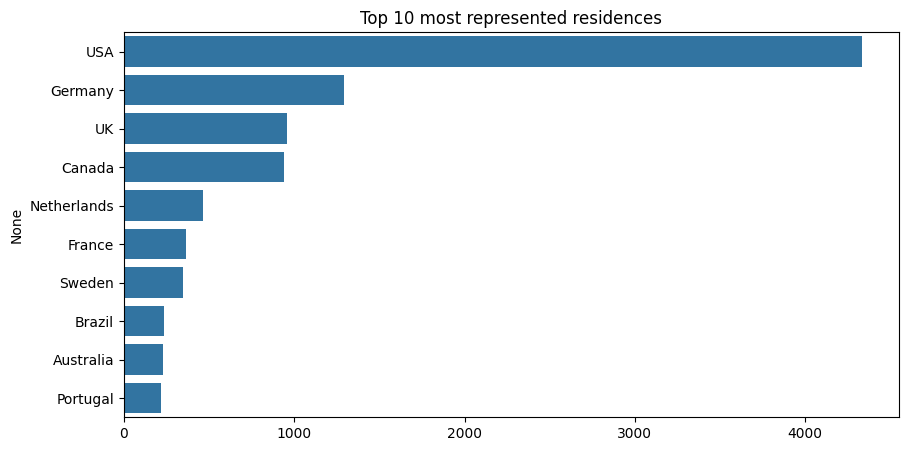

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Residence.value_counts()[:10].values, y=df.Residence.value_counts()[:10].index)
plt.title('Top 10 most represented residences')
plt.show()

Playstyle

<ipython-input-39-dec0b3f93350>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Playstyle'].value_counts().values, y=df['Playstyle'].value_counts().index, palette="vlag")


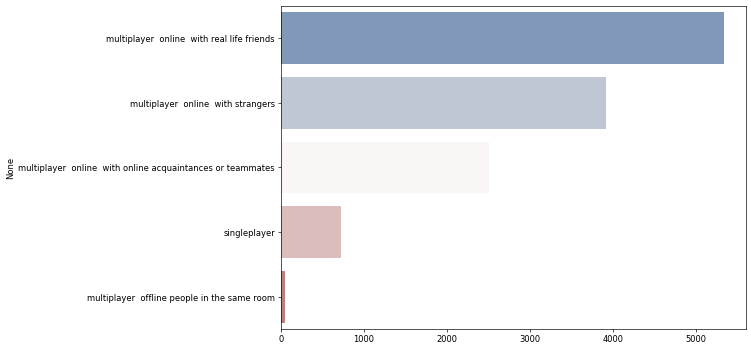

In [ ]:
plt.figure(figsize=(10, 7),dpi=60)
sns.barplot(x=df['Playstyle'].value_counts().values, y=df['Playstyle'].value_counts().index, palette="vlag")
# plt.savefig("hours_plot.png")
plt.show()

Whyplay

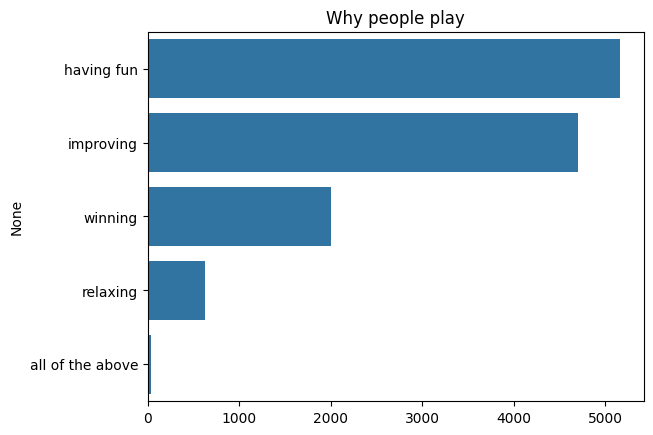

In [ ]:
sns.barplot(x=df.whyplay.value_counts()[:5].values, y=df.whyplay.value_counts()[:5].index)

plt.title('Why people play')
plt.show()

Platform used

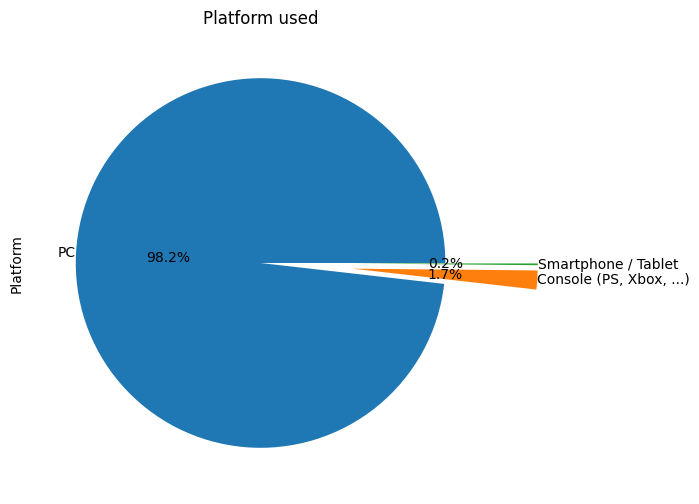

In [ ]:
plt.figure(figsize=(6,6))
myexplode = [0, 0.5, 0.5]
df.Platform.value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5, labeldistance=1, explode=myexplode  )
plt.title("Platform used")
plt.show()

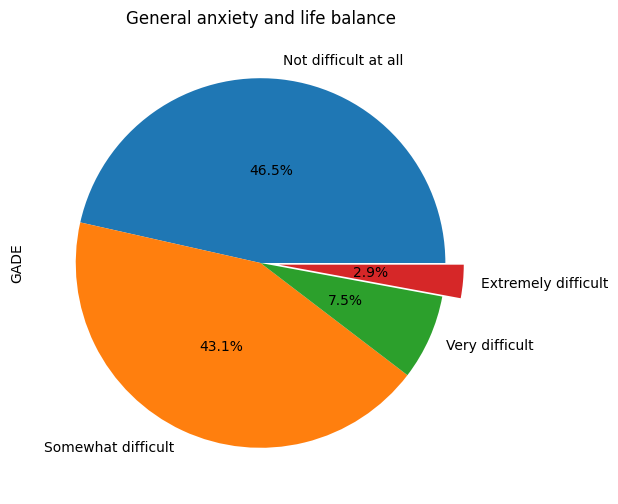

In [ ]:
plt.figure(figsize=(6,6))
myexplode = [0,0,0,0.1]
df.GADE.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("General anxiety and life balance")
plt.show()

Normalization

In [ ]:
#Normalization

from sklearn.preprocessing import MinMaxScaler
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
df[cols] = sc.fit_transform(df[cols])

GAD1


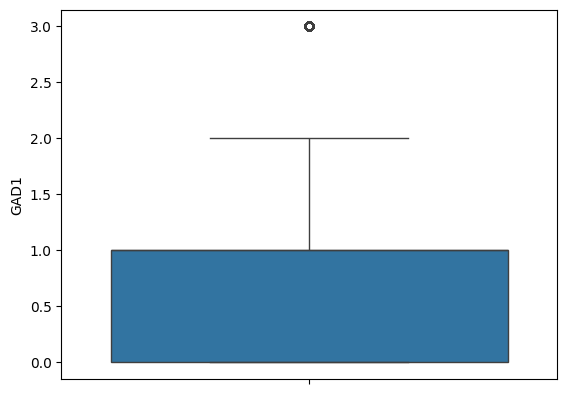

GAD2


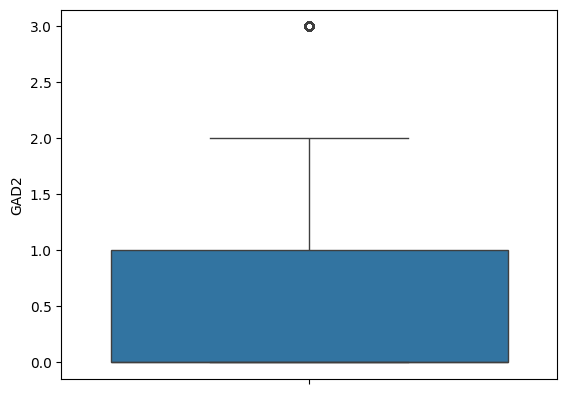

GAD3


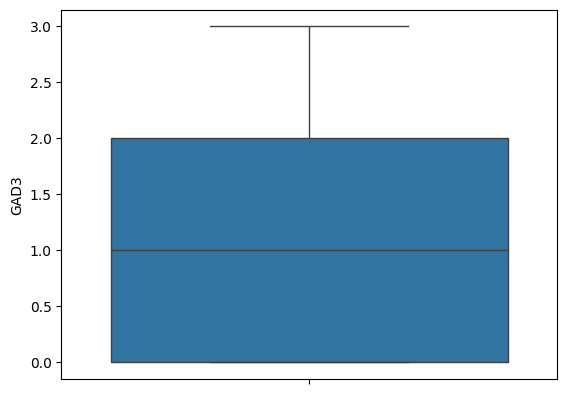

GAD4


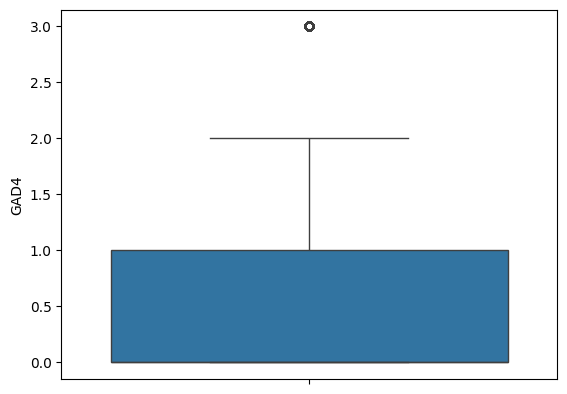

GAD5


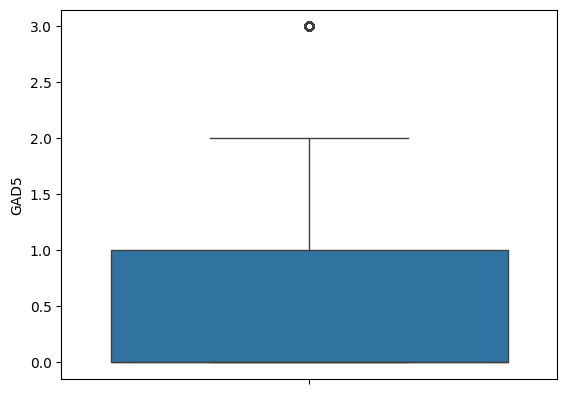

GAD6


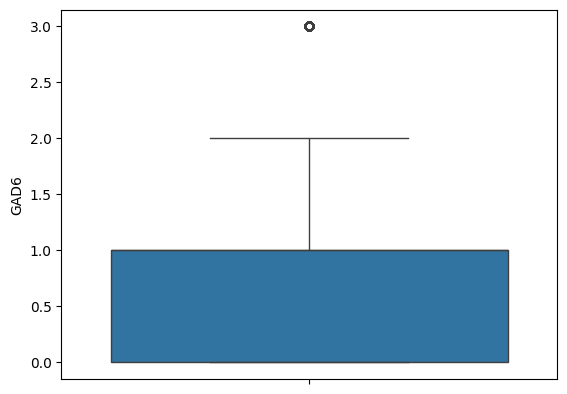

GAD7


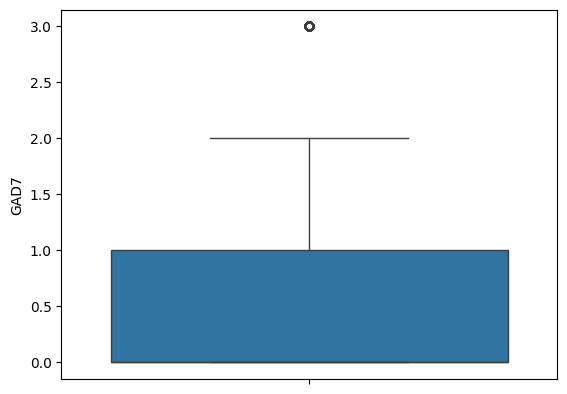

GADE
SWL1


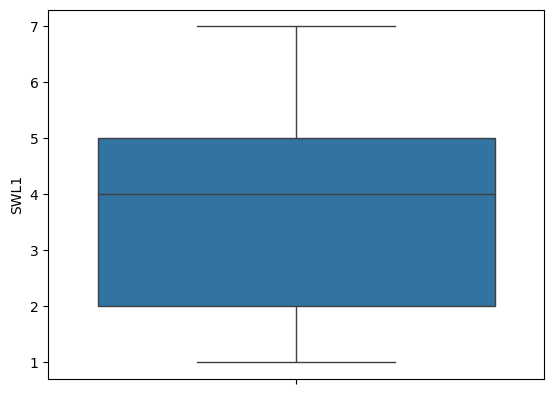

SWL2


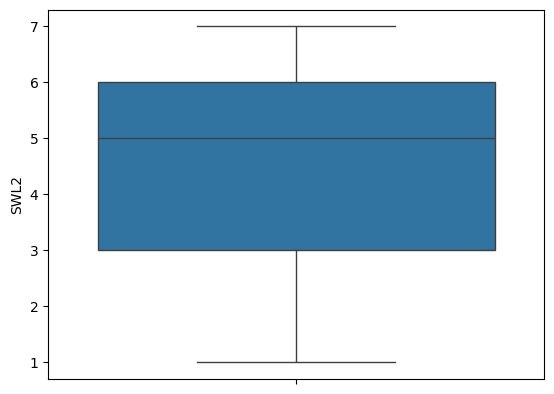

SWL3


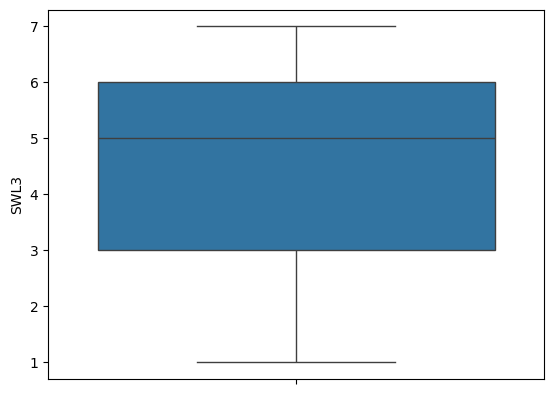

SWL4


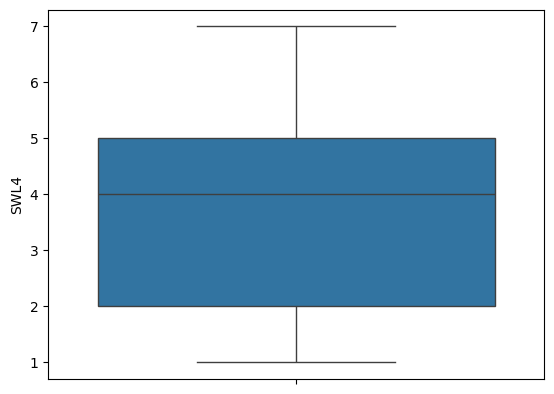

SWL5


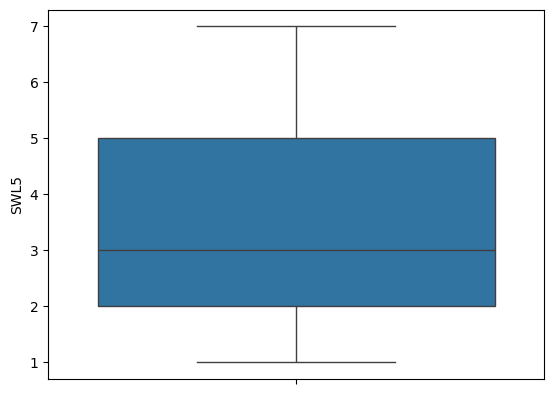

Game
Platform
Hours


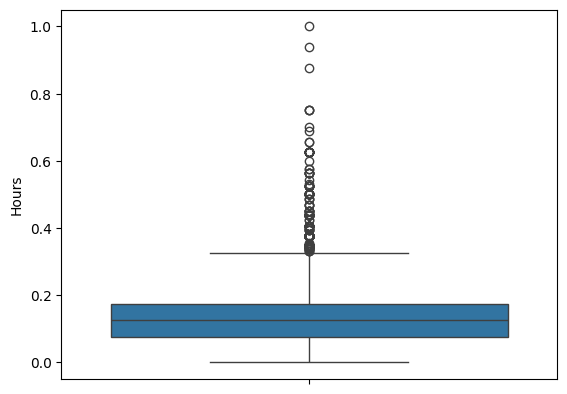

earnings
whyplay
League
streams


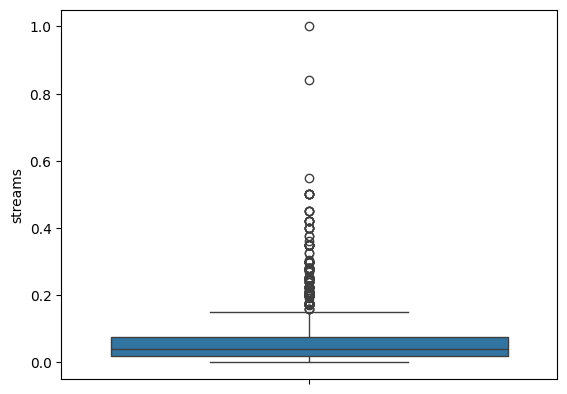

SPIN1


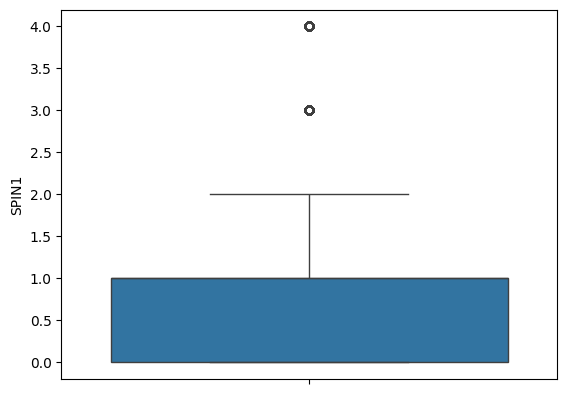

SPIN2


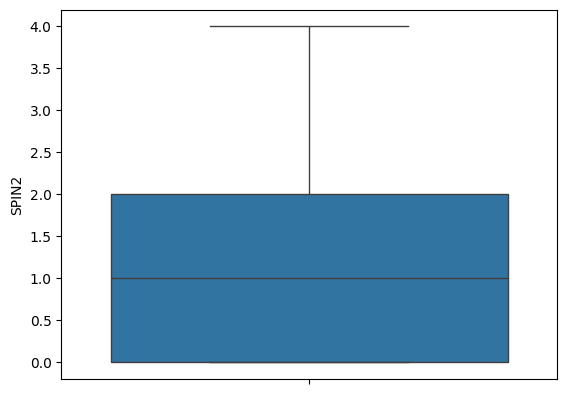

SPIN3


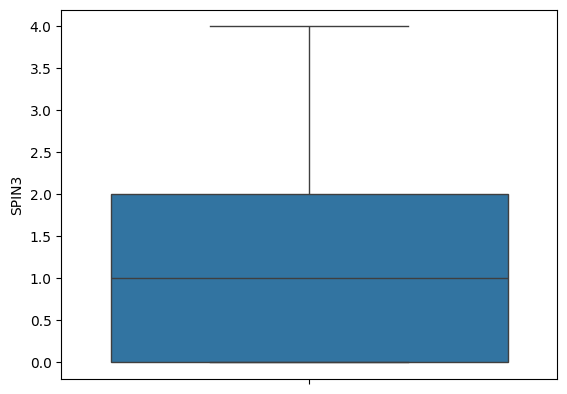

SPIN4


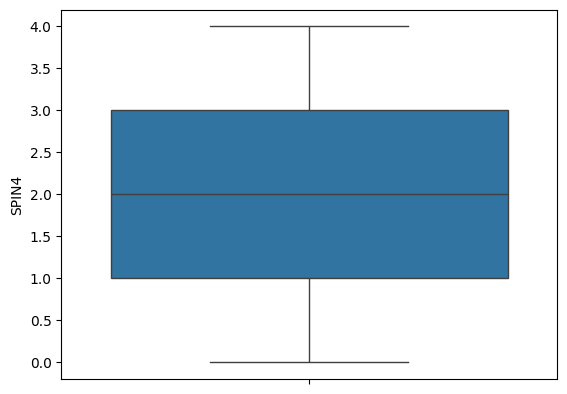

SPIN5


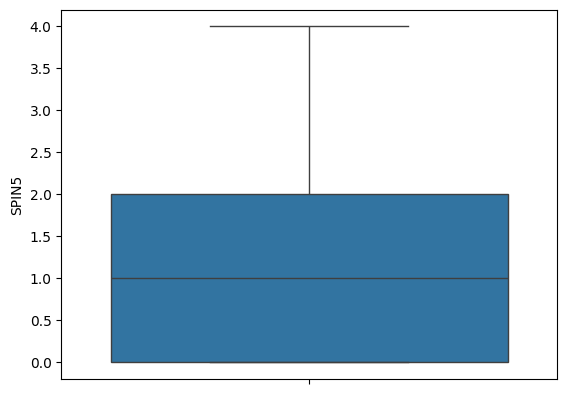

SPIN6


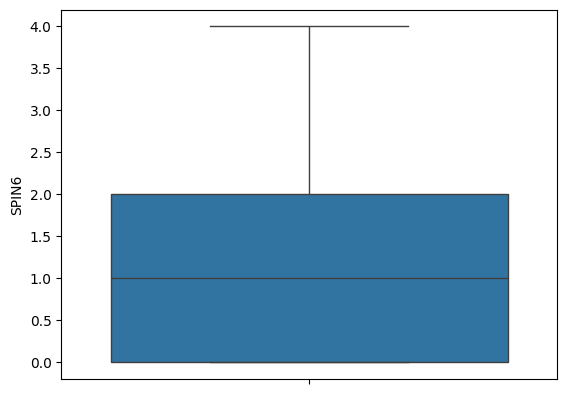

SPIN7


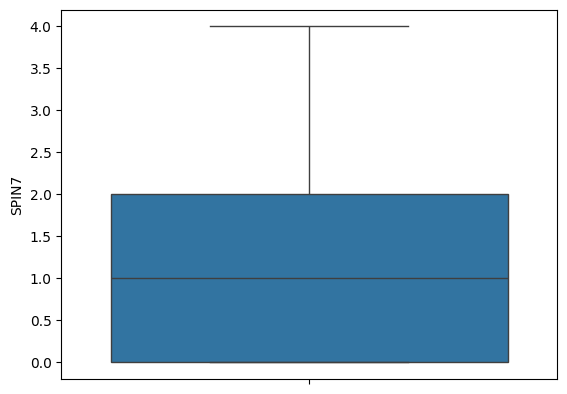

SPIN8


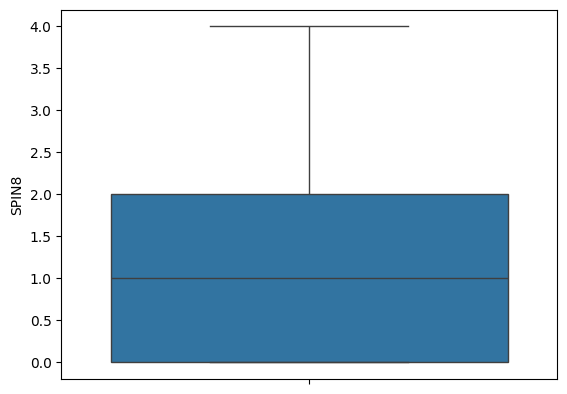

SPIN9


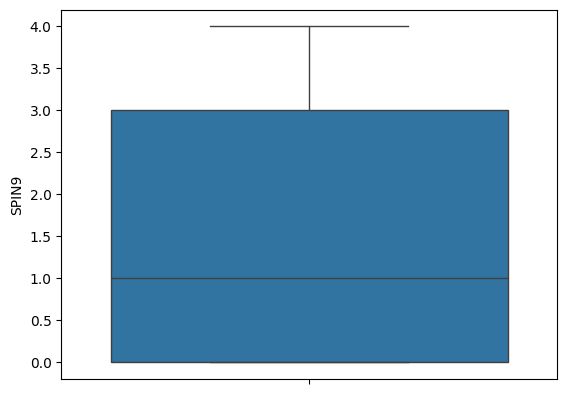

SPIN10


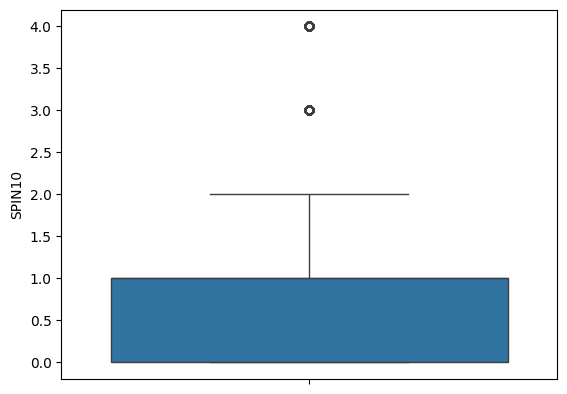

SPIN11


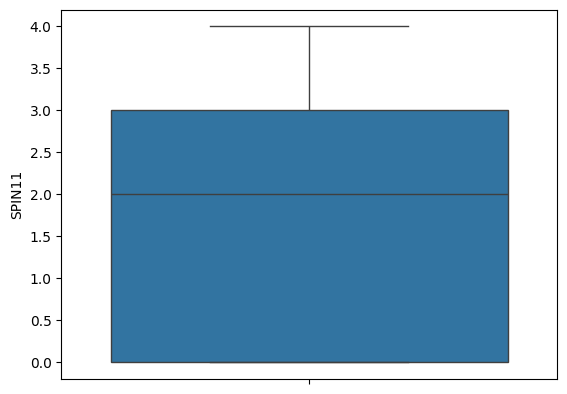

SPIN12


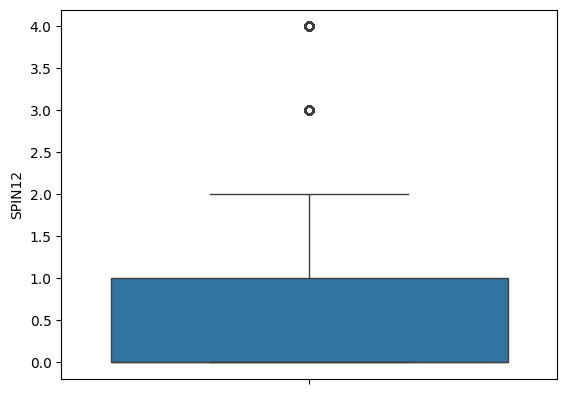

SPIN13


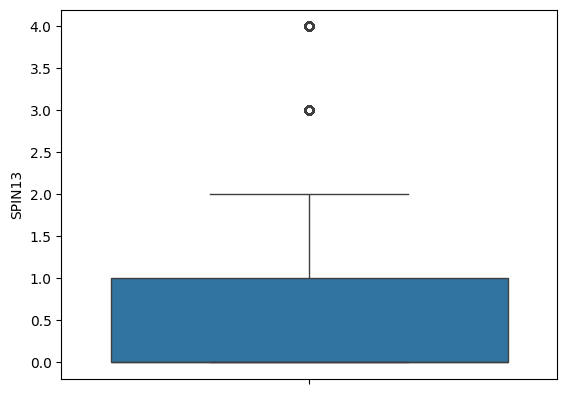

SPIN14


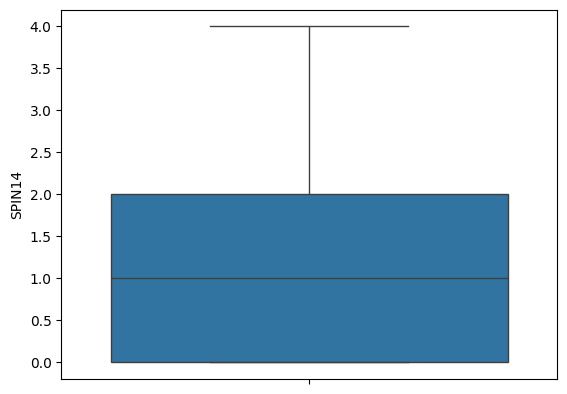

SPIN15


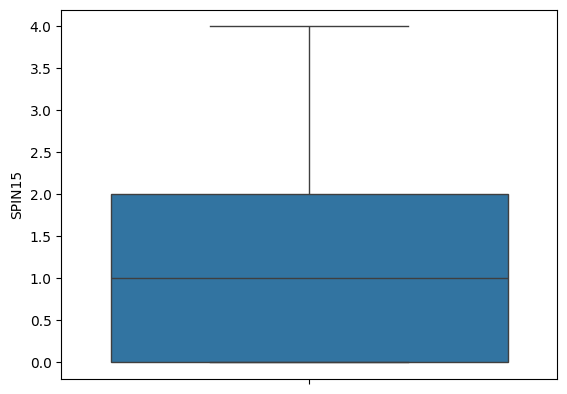

SPIN16


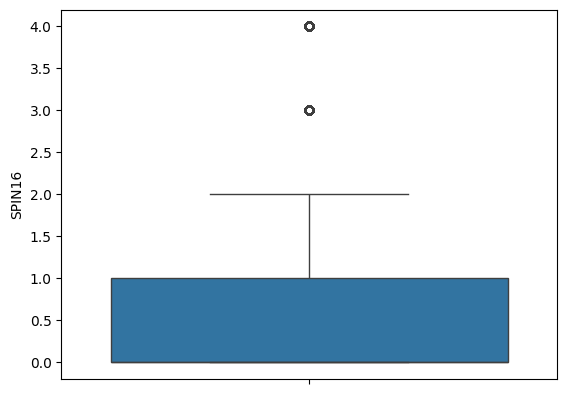

SPIN17


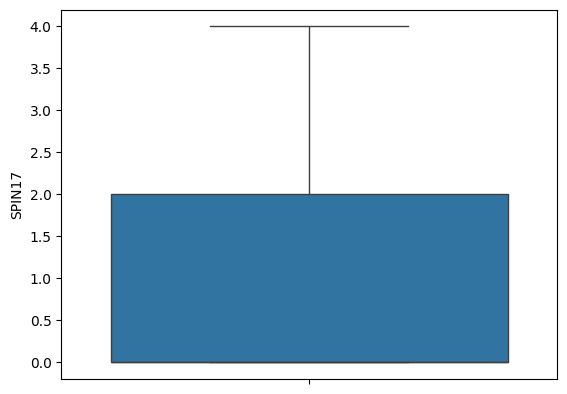

Narcissism


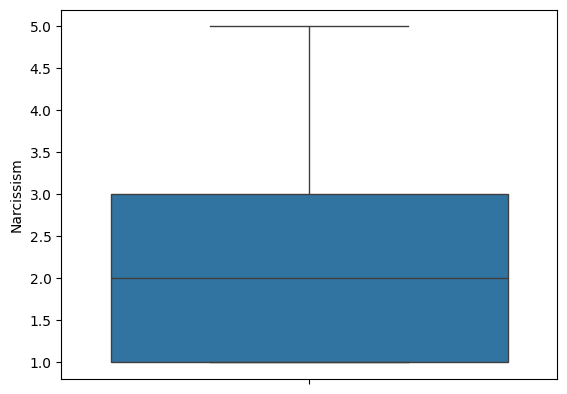

Gender
Age


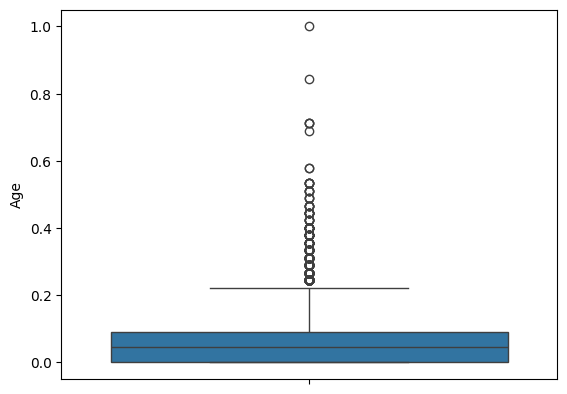

Work
Degree
Residence
Reference
Playstyle
GAD_T


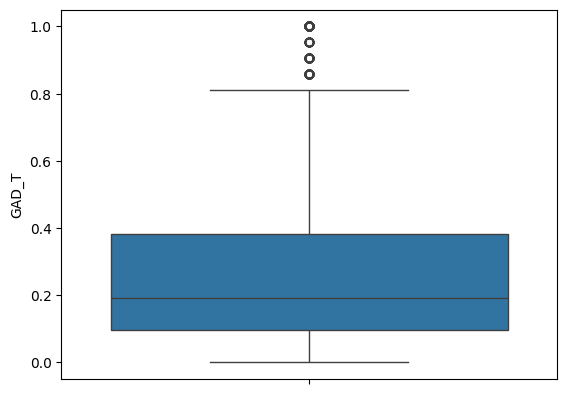

SWL_T


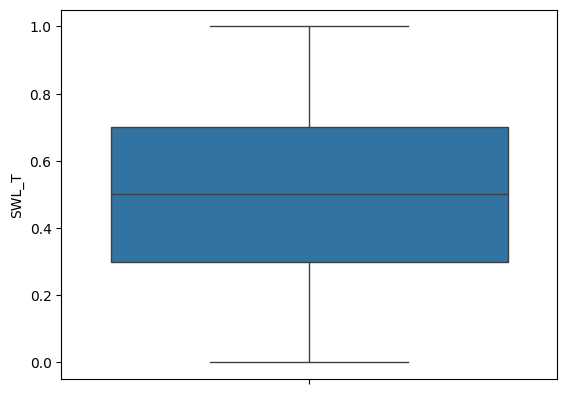

SPIN_T


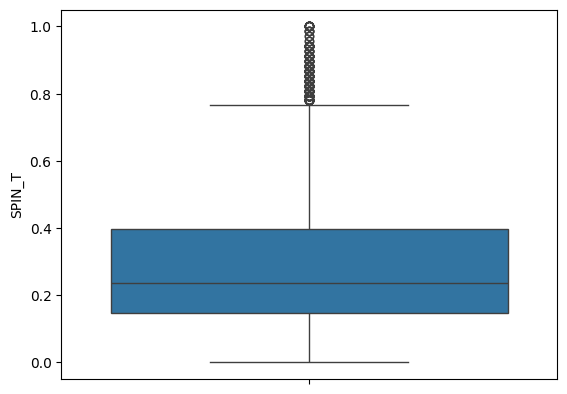

Residence_ISO3


In [ ]:
#Handling outliers
for i in df:
    print(i)
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [ ]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)

<ipython-input-46-2b0a5e66572c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',linewidths=1)


<Axes: >

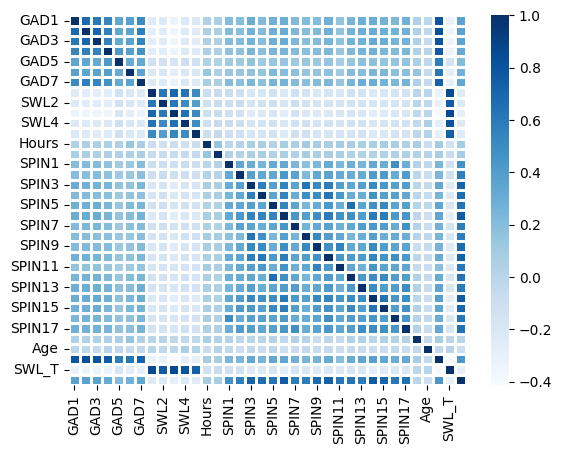

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',linewidths=1)


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=encoder.fit_transform(df[i])

In [ ]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
S. No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,1,3,5,...,0.155556,3,0,103,2,4,0.047619,0.600000,0.073529,102
2,1,2,2,2,0,1,0,2,3,5,...,0.511111,3,0,103,2,3,0.380952,0.366667,0.485294,102
3,0,2,2,0,0,3,1,1,2,6,...,0.311111,0,0,34,2,4,0.380952,0.400000,0.455882,23
4,0,0,0,0,0,0,0,1,2,5,...,0.222222,0,0,103,2,1,0.000000,0.400000,0.161765,102
5,2,1,2,2,2,3,2,3,2,2,...,0.022222,0,1,90,2,3,0.666667,0.300000,0.191176,56


PCA

In [ ]:
from sklearn.decomposition import PCA

df1 = df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = df[[ 'Age' ,  'Hours' , 'streams' ]]

pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)

x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)

x = x1 + x2

Elbow method to determine number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

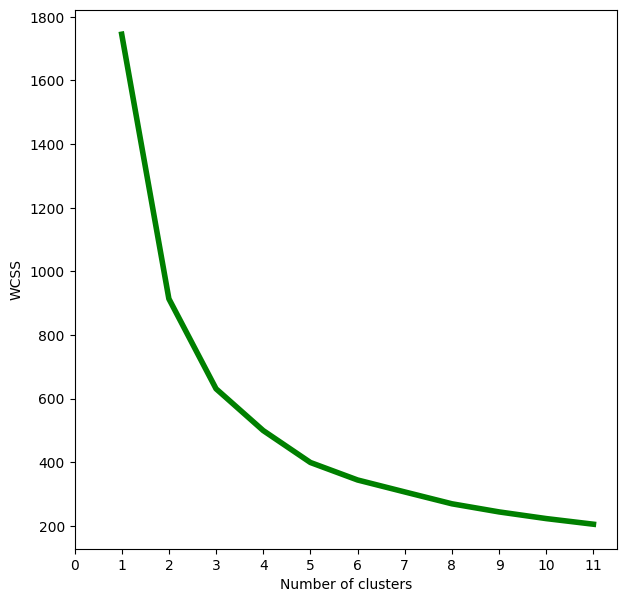

In [ ]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),WCSS, linewidth=4, markersize=12,color = 'green')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

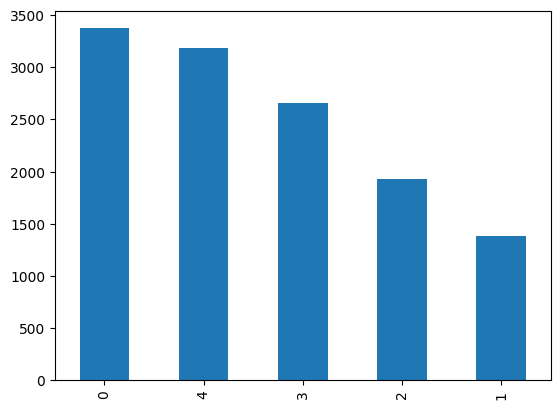

In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
model.fit(x)
y=model.predict(x)
pd.Series(y).value_counts().plot(kind='bar')

In [ ]:
df['cluster']=y
df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,cluster
S. No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,1,3,5,...,3,0,103,2,4,0.047619,0.600000,0.073529,102,4
2,1,2,2,2,0,1,0,2,3,5,...,3,0,103,2,3,0.380952,0.366667,0.485294,102,2
3,0,2,2,0,0,3,1,1,2,6,...,0,0,34,2,4,0.380952,0.400000,0.455882,23,2
4,0,0,0,0,0,0,0,1,2,5,...,0,0,103,2,1,0.000000,0.400000,0.161765,102,0
5,2,1,2,2,2,3,2,3,2,2,...,0,1,90,2,3,0.666667,0.300000,0.191176,56,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,1,0,0,1,0,1,1,1,6,6,...,1,2,32,2,3,0.190476,0.766667,0.102941,33,4
14247,3,3,3,3,2,3,3,0,5,5,...,1,1,103,2,3,0.952381,0.600000,0.367647,102,1
14248,0,0,0,0,0,0,0,1,6,6,...,1,1,71,2,2,0.000000,0.900000,0.147059,74,4


Text(0.5, 1.0, 'clusters')

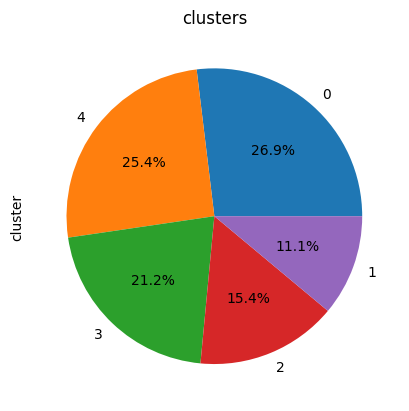

In [ ]:
df.cluster.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('clusters')

In [ ]:
x1=df.iloc[:,:-1].values
x1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.00000000e-01, 7.35294118e-02, 1.02000000e+02],
       [1.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        3.66666667e-01, 4.85294118e-01, 1.02000000e+02],
       [0.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        4.00000000e-01, 4.55882353e-01, 2.30000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.00000000e-01, 1.47058824e-01, 7.40000000e+01],
       [3.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        3.66666667e-01, 4.70588235e-01, 1.50000000e+01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-01, 2.05882353e-01, 1.50000000e+01]])

In [ ]:
y1=df.iloc[:,-1].values
y

array([4, 2, 2, ..., 4, 3, 4], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.33333333e-01, 1.17647059e-01, 3.50000000e+01],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.33333333e-01, 2.64705882e-01, 1.02000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.33333333e-01, 2.94117647e-02, 3.50000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        3.33333333e-01, 4.70588235e-01, 8.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.33333333e-01, 2.20588235e-01, 4.40000000e+01],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        5.00000000e-01, 4.85294118e-01, 1.02000000e+02]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000 , random_state=42, max_depth=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8448642895156998

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1134
           1       0.78      0.94      0.86       330
           2       0.73      0.86      0.79       499
           3       0.87      0.83      0.85       865
           4       0.88      0.89      0.88       930

    accuracy                           0.84      3758
   macro avg       0.83      0.86      0.84      3758
weighted avg       0.85      0.84      0.85      3758



In [ ]:
confusion_matrix(y_pred,y_test)

array([[894,   1,  58,  76, 105],
       [  0, 310,   9,  11,   0],
       [ 18,  25, 430,  19,   7],
       [ 44,  59,  46, 716,   0],
       [ 54,   0,  50,   1, 825]])